In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

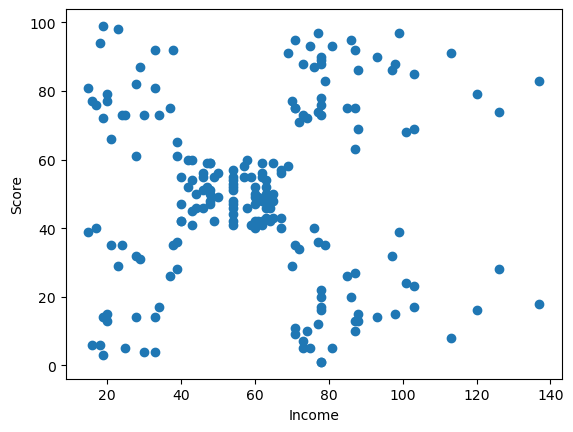

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [9]:
x = df.iloc[:,[3,4]].values

In [11]:
k = 5
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)
y = model.predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

AttributeError: 'KMeans' object has no attribute 'clusters_centers_'

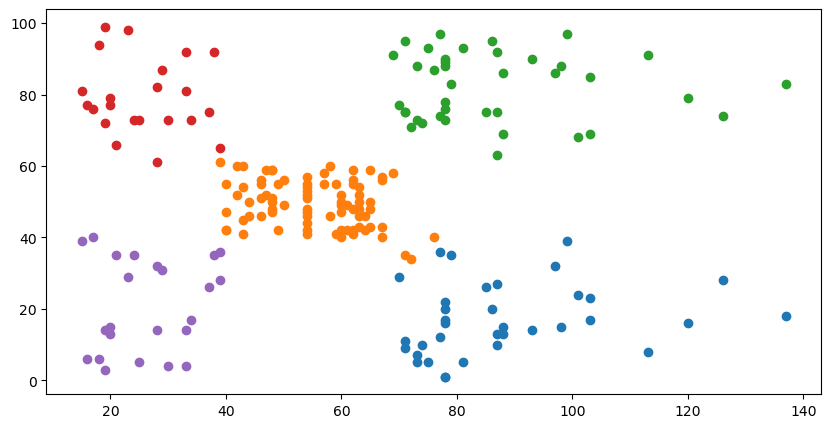

In [14]:
plt.figure(figsize = (10,5))
for i in range (k):
    plt.scatter(x[y==i,0],x[y==i,1],label = f'cluster {i}')
plt.scatter(model.clusters_centers_[:,0],model.cluster_centers_[:,1],s=300,
           c='yellow',label='Centroids')
plt.legend()
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

C:\Users\Shivam Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


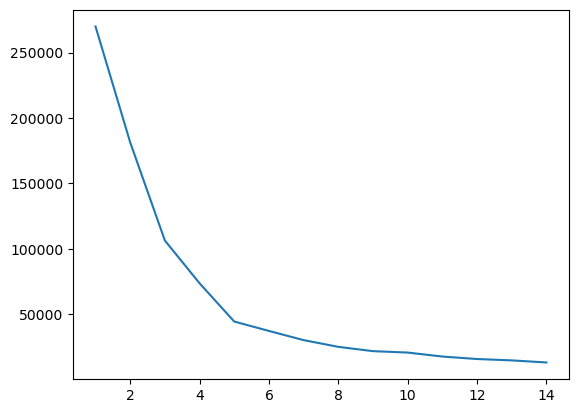

In [15]:
#Elbow method to find the value of k
k = range(1,15)
sse = []
for i in k:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(x)
    sse.append(model_demo.inertia_)
plt.plot(k,sse)
plt.show()

In [16]:
#Silhouette Score
from sklearn.metrics import silhouette_score

In [17]:
silhouette_score(x,y)

0.553931997444648

2 Clusters, Score = 0.2968969162503008
3 Clusters, Score = 0.46761358158775435
4 Clusters, Score = 0.4931963109249047
5 Clusters, Score = 0.553931997444648
6 Clusters, Score = 0.5379675585622219
7 Clusters, Score = 0.5264283703685728
8 Clusters, Score = 0.45704384633565154
9 Clusters, Score = 0.4563032021725485
10 Clusters, Score = 0.4492169169017592
11 Clusters, Score = 0.437104484577306
12 Clusters, Score = 0.42507724579994494
13 Clusters, Score = 0.4361876168478583
14 Clusters, Score = 0.40466460708668867


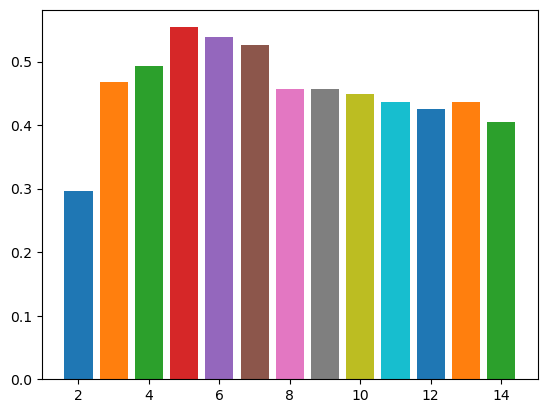

In [18]:
#Check score from k=2 to k=8
k = range(2,15)
for i in k:
    model_demo = KMeans(n_clusters=i,random_state=0)
    model_demo.fit(x)
    y=model_demo.predict(x)
    print(f"{i} Clusters, Score = {silhouette_score(x,y)}")
    plt.bar(i,silhouette_score(x,y))
plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
data=pd.read_csv("Mall_Customers.csv")

In [32]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\Shivam Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

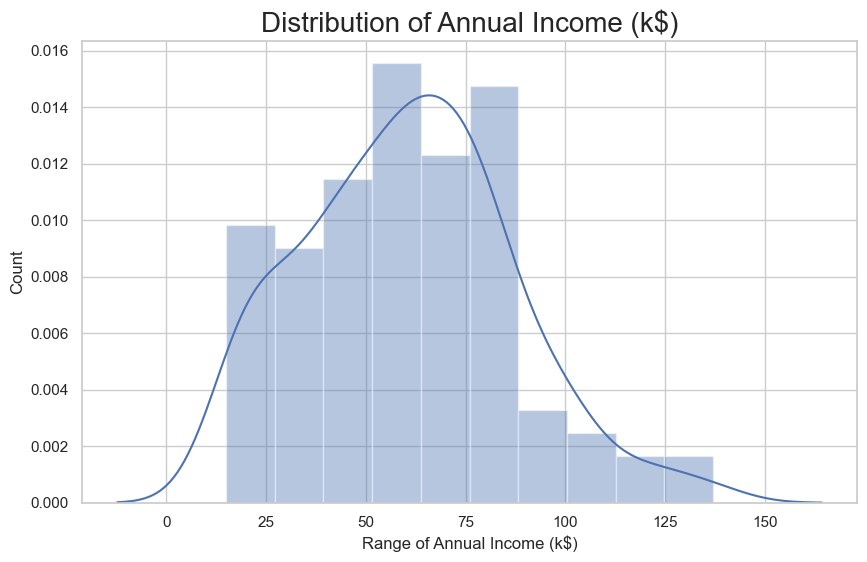

In [34]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\Shivam Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

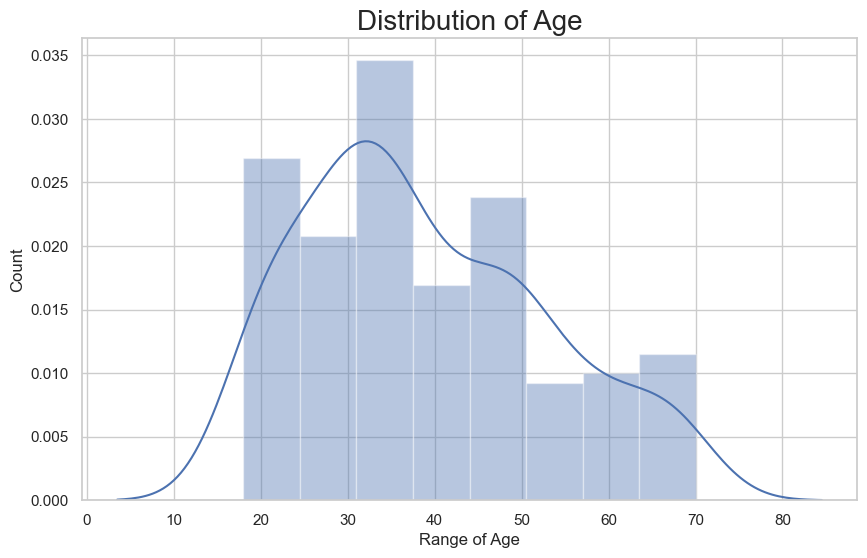

In [35]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\Shivam Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

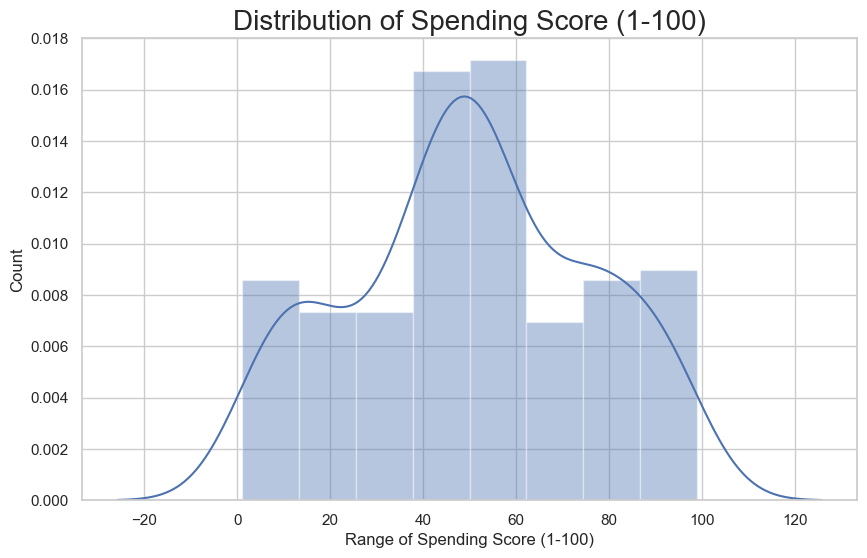

In [36]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

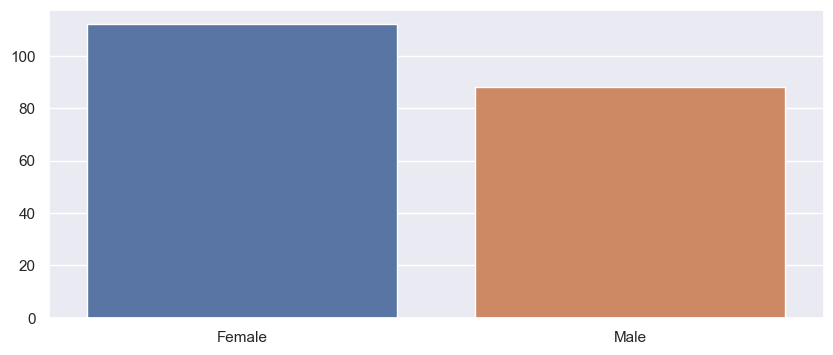

In [37]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [39]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [40]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


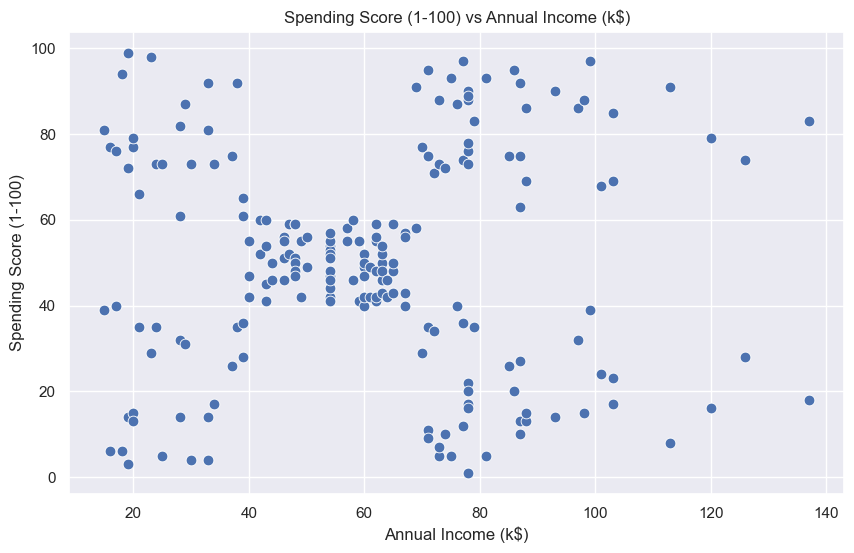

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [42]:
from sklearn.cluster import KMeans

C:\Users\Shivam Singh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


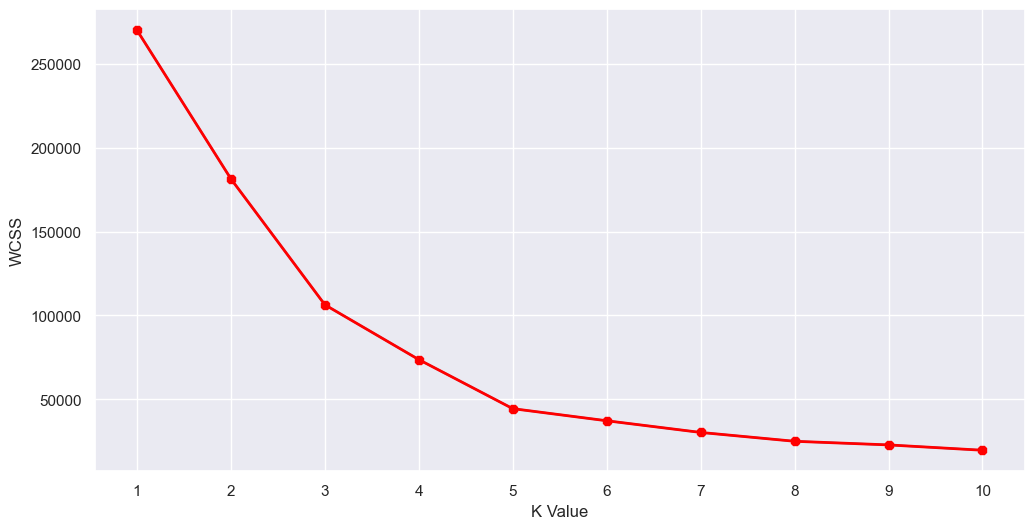

In [45]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [47]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


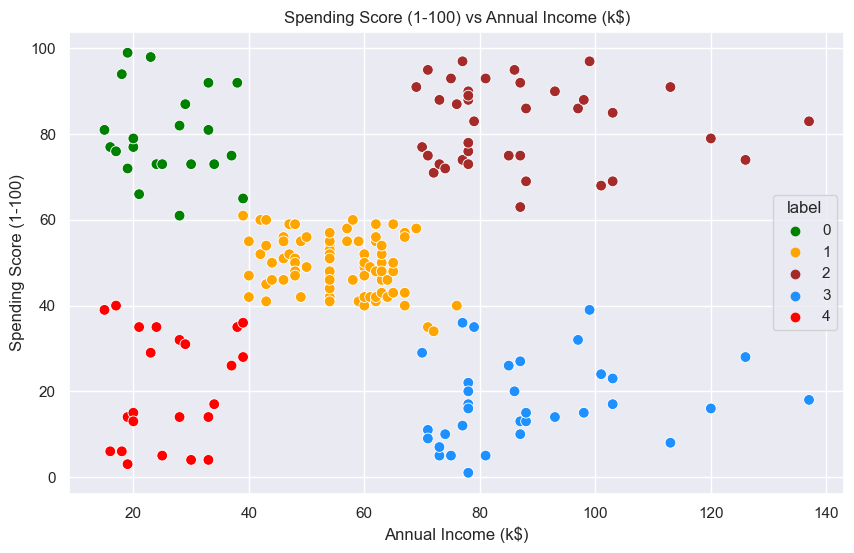

In [48]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [51]:
#Taking the features
X2=df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

NameError: name 'df2' is not defined

NameError: name 'df2' is not defined

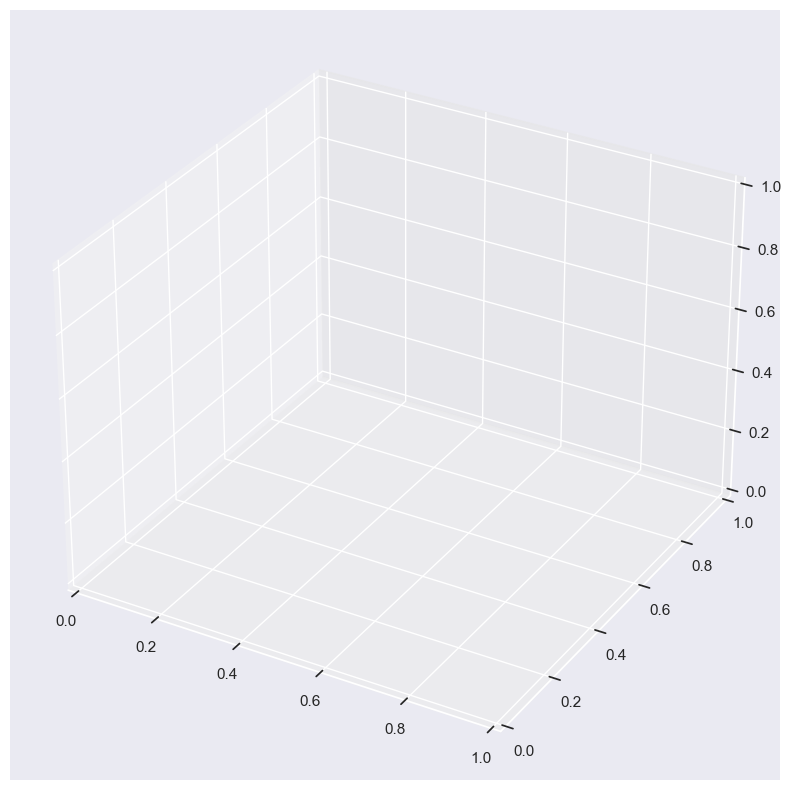

In [46]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [9]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid') 

In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.drop('Gender', axis = 1, inplace = True)
df.set_index('Age', inplace = True)

df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
Age,,,
19,1,15,39
21,2,15,81
20,3,16,6
23,4,16,77
31,5,17,40


In [43]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
Age,,,
19,1,15,39
21,2,15,81
20,3,16,6
23,4,16,77
31,5,17,40
